# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

Данные геологоразведки трёх регионов находятся в файлах: 
•	/datasets/geo_data_0.csv. Скачать датасет
•	/datasets/geo_data_1.csv. Скачать датасет
•	/datasets/geo_data_2.csv. Скачать датасет
•	id — уникальный идентификатор скважины;
•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
•	product — объём запасов в скважине (тыс. баррелей).

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

План выполнения проекта:
1.	Загрузите и подготовьте данные. Поясните порядок действий.
2.	Обучите и проверьте модель для каждого региона:
- Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучите модель и сделайте предсказания на валидационной выборке.
- Сохраните предсказания и правильные ответы на валидационной выборке.
- Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- Проанализируйте результаты.
3.	Подготовьтесь к расчёту прибыли:
- Все ключевые значения для расчётов сохраните в отдельных переменных.
- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
- Напишите выводы по этапу подготовки расчёта прибыли.
4.	Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберите скважины с максимальными значениями предсказаний. 
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.
5.	Посчитайте риски и прибыль для каждого региона:
- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


## Загрузка и подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy import stats as st

In [2]:
try:
    df_1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_1 = pd.read_csv('geo_data_0.csv')

In [3]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
try:
    df_2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_2 = pd.read_csv('geo_data_1.csv')

In [5]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
try:
    df_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_3 = pd.read_csv('geo_data_2.csv')

In [7]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
# размер таблиц

all_df = [df_1, df_2, df_3]
for data in all_df:
    print('Размер', data.shape)

Размер (100000, 5)
Размер (100000, 5)
Размер (100000, 5)


In [9]:
for data in all_df:
    print('Тип данных', data.dtypes)

Тип данных id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
Тип данных id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
Тип данных id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


В трех таблицах у нас все переменные количественные (за исключением столбца id).

In [10]:
# общая информация по таблицам

for data in all_df:
    print('Тип данных', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Тип данных None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Тип данных None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 c

In [11]:
# пропуски данных:

for data in all_df:
    print('Тип данных', data.isna().sum())

Тип данных id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Тип данных id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Тип данных id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


В каждой из трех таблиц 100 000 строк (индексация с 0 до 99 999), 5 столбцов. Все столбцы, кроме id числовые. 

Пропуски отсутствуют во всех трех таблицах.

In [12]:
# проверка наименований столбцов
#df_1.columns
#df_2.columns
#df_3.columns
for data in all_df:
    print('Тип данных', data.columns)

Тип данных Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')
Тип данных Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')
Тип данных Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')


Названия столбцов корректные, лишних пробелов нет, регистр нижний.

In [13]:
# Проверка наличия явных дубликатов в каждой из таблиц
print('Проверка дубликатов df_1', df_1.duplicated().sum())
print('Проверка дубликатов df_2', df_2.duplicated().sum())
print('Проверка дубликатов df_3', df_3.duplicated().sum())

Проверка дубликатов df_1 0
Проверка дубликатов df_2 0
Проверка дубликатов df_3 0


Явные дубликаты отсутствуют.

In [14]:
# проверка наличия неявных дубликатов в столбце id без корректировки id (без применения методов строк)
#df_1
#df_2
#df_3

for df in all_df:
    print('Количество уникальных значений столбца id:', len(df['id'].unique()))
    print('Количество неявных дубликатов в столбце "id":', df['id'].duplicated().sum())
    print(df['id'].value_counts().head())
    print()

Количество уникальных значений столбца id: 99990
Количество неявных дубликатов в столбце "id": 10
HZww2    2
bsk9y    2
fiKDv    2
AGS9W    2
A5aEY    2
Name: id, dtype: int64

Количество уникальных значений столбца id: 99996
Количество неявных дубликатов в столбце "id": 4
LHZR0    2
5ltQ6    2
bfPNe    2
wt4Uk    2
o0EUw    1
Name: id, dtype: int64

Количество уникальных значений столбца id: 99996
Количество неявных дубликатов в столбце "id": 4
KUPhW    2
xCHr8    2
Vcm5J    2
VF7Jo    2
J53n4    1
Name: id, dtype: int64



In [15]:
# проверка наличия неявных дубликатов в id
# применение метода строк (приведение к нижнему регистру и удаление пробелов в начале и конце строки)
#df_1
#df_2
#df_3

for df in all_df:
    df['id'] = df['id'].str.lower()
    df['id'] = df['id'].str.strip()
    print('Количество уникальных значений столбца id:', len(df['id'].unique()))
    print('Количество неявных дубликатов в столбце "id":', df['id'].duplicated().sum())
    print(df['id'].value_counts().head())
    print()
    

Количество уникальных значений столбца id: 99887
Количество неявных дубликатов в столбце "id": 113
pixsi    2
jqqnk    2
rmsho    2
bkzro    2
xudjb    2
Name: id, dtype: int64

Количество уникальных значений столбца id: 99887
Количество неявных дубликатов в столбце "id": 113
jkqh5    2
qkgtx    2
ioxco    2
dszdc    2
bfpne    2
Name: id, dtype: int64

Количество уникальных значений столбца id: 99901
Количество неявных дубликатов в столбце "id": 99
fqhcv    2
rfovm    2
w3irn    2
mvpex    2
xzcmv    2
Name: id, dtype: int64



In [16]:
# дублирование с столбце id таблицы df_1
dubl_1 = df_1['id']
df_1[dubl_1.isin(dubl_1[dubl_1.duplicated()])].sort_values('id')

,id,f0,f1,f2,product
13565,1sqvs,0.667155,-0.369779,3.090661,91.832501
24119,1sqvs,-0.004076,0.247957,3.492057,182.740215
66673,2phtu,0.138155,0.918442,6.937824,117.822922
19994,2phtu,1.191172,-0.512402,2.284509,116.839531
34994,2qwma,0.212557,0.066123,-0.953608,99.615392
...,...,...,...,...,...
82920,zfbah,0.740564,0.735486,2.527043,122.725894
24832,zogg5,0.903400,0.280381,7.785311,147.175587
42728,zogg5,-0.737814,0.816968,1.294454,111.627193
39213,zvksv,0.860384,-0.499165,5.217343,120.102105


In [17]:
# дублирование с столбце id таблицы df_2
dubl_2 = df_2['id']
df_2[dubl_2.isin(dubl_2[dubl_2.duplicated()])].sort_values('id')

,id,f0,f1,f2,product
90286,02juy,-7.470202,-11.130912,5.001146,137.945408
7111,02juy,9.730261,1.272253,2.002609,53.906522
28740,0vyhp,-13.359057,-4.994226,0.999059,30.132364
72602,0vyhp,-9.540485,6.590890,3.000125,84.038886
13576,2lern,6.964761,-7.282841,4.000355,107.813044
...,...,...,...,...,...
68728,zwwwh,-6.819271,-9.023742,0.005720,3.179103
60799,zyegi,11.631400,1.442540,5.001731,134.766305
73488,zyegi,-2.519756,-3.339500,3.004422,84.038886
14821,zyvuy,6.262422,-7.906983,-0.004427,0.000000


In [18]:
# дублирование с столбце id таблицы df_3
dubl_3 = df_3['id']
df_3[dubl_3.isin(dubl_3[dubl_3.duplicated()])].sort_values('id')

,id,f0,f1,f2,product
87893,0jrjy,3.795287,-1.028641,6.460283,148.625147
92343,0jrjy,0.163728,2.003687,1.550877,53.388635
37800,0kkig,1.223558,-0.275630,7.035492,150.332182
78886,0kkig,-0.857585,-1.969698,1.229993,163.262973
27871,0tyyi,-1.175388,-2.154337,-1.084661,30.152253
...,...,...,...,...,...
66349,znlds,1.963687,-0.779411,2.386001,29.538412
43576,zrngv,1.788106,-0.480662,7.393034,105.484341
19363,zrngv,0.395785,0.998022,0.827759,38.965521
38113,zvith,-0.249816,1.172505,3.430165,60.741729


В датасете обнаружены неявные дубликаты. Дублируются названия скважин, а все признаки различаются. Так как нет возможности вяснить, какие данные реальны, и таких строк в общем объеме мало (df_1 - 113 скважин, df_2 - 113 скважины, df_3 - 98 скважины) - удалим строки с неявными дубликатами.

In [19]:
# удадяем строки с неявными дубликатами в df_1, df_2, df_3

df_1 = df_1.drop_duplicates(subset=['id'], keep=False)
print('Количество уникальных значений столбца id таблицы df_1:', len(df_1['id'].unique()))
print('Количество неявных дубликатов в столбце "id" таблицы df_1:', df_1['id'].duplicated().sum())
print(df_1['id'].value_counts().head())
print()
df_2 = df_2.drop_duplicates(subset=['id'], keep=False)
print('Количество уникальных значений столбца id таблицы df_2:', len(df_2['id'].unique()))
print('Количество неявных дубликатов в столбце "id" таблицы df_2:', df_2['id'].duplicated().sum())
print(df_2['id'].value_counts().head())
print()
df_3 = df_3.drop_duplicates(subset=['id'], keep=False)
print('Количество уникальных значений столбца id таблицы df_3:', len(df_3['id'].unique()))
print('Количество неявных дубликатов в столбце "id" таблицы df_3:', df_3['id'].duplicated().sum())
print(df_3['id'].value_counts().head())
print()

Количество уникальных значений столбца id таблицы df_1: 99774
Количество неявных дубликатов в столбце "id" таблицы df_1: 0
bzk02    1
suoag    1
npwwg    1
xaf6e    1
2zdx3    1
Name: id, dtype: int64

Количество уникальных значений столбца id таблицы df_2: 99774
Количество неявных дубликатов в столбце "id" таблицы df_2: 0
nljjy    1
zlxxb    1
jt0ui    1
1caq6    1
lb1ev    1
Name: id, dtype: int64

Количество уникальных значений столбца id таблицы df_3: 99802
Количество неявных дубликатов в столбце "id" таблицы df_3: 0
3cez9    1
ystng    1
sxyym    1
pxtwa    1
8v8im    1
Name: id, dtype: int64



In [20]:
# размер таблиц
all_df = [df_1, df_2, df_3]
for data in all_df:
    print('Размер', data.shape)

Размер (99774, 5)
Размер (99774, 5)
Размер (99802, 5)


### Описание 1-го региона df_0

In [21]:
# описательная статистика и корреляция для df_1

print('Описательная статистика для df_1')
print(df_1.describe())
print()
print('Показатели корреляции df_1')
print(df_1.corr())

Описательная статистика для df_1
                 f0            f1            f2       product
count  99774.000000  99774.000000  99774.000000  99774.000000
mean       0.500558      0.250084      2.502705     92.498563
std        0.871944      0.504424      3.248072     44.291747
min       -1.408605     -0.848218    -12.088328      0.000000
25%       -0.072712     -0.200922      0.288084     56.486212
50%        0.502454      0.250085      2.515416     91.847928
75%        1.073942      0.700571      4.715313    128.568240
max        2.362331      1.343769     16.003790    185.364347

Показатели корреляции df_1
               f0        f1        f2   product
f0       1.000000 -0.440760 -0.003256  0.143508
f1      -0.440760  1.000000  0.001930 -0.192217
f2      -0.003256  0.001930  1.000000  0.483626
product  0.143508 -0.192217  0.483626  1.000000


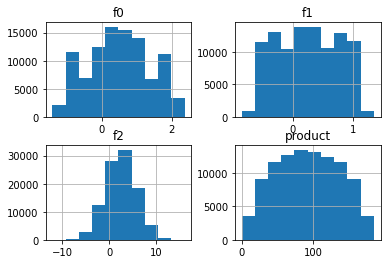

In [22]:
df_1[['f0', 'f1', 'f2', 'product']].hist()
plt.show()

### Описание 2-го региона df_2

In [23]:
# описательная статистика и корреляция для df_2

print('Описательная статистика для df_2')
print(df_2.describe())
print()
print('Показатели корреляции df_2')
print(df_2.corr())

Описательная статистика для df_2
                 f0            f1            f2       product
count  99774.000000  99774.000000  99774.000000  99774.000000
mean       1.141694     -4.797206      2.495020     68.837711
std        8.966110      5.120475      1.703707     45.948340
min      -31.609576    -26.358598     -0.018144      0.000000
25%       -6.297770     -8.267926      1.000027     26.953261
50%        1.153055     -4.813373      2.011586     57.085625
75%        8.621963     -1.333547      3.999910    107.813044
max       29.421755     18.734063      5.019721    137.945408

Показатели корреляции df_2
               f0        f1        f2   product
f0       1.000000  0.182168 -0.002010 -0.030719
f1       0.182168  1.000000 -0.002682 -0.010242
f2      -0.002010 -0.002682  1.000000  0.999397
product -0.030719 -0.010242  0.999397  1.000000


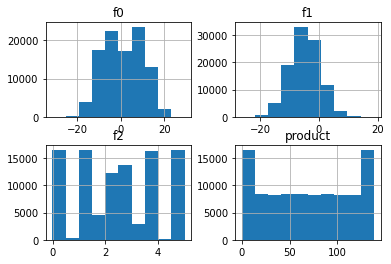

In [24]:
df_2[['f0', 'f1', 'f2', 'product']].hist()
plt.show()

### Описание 3-го региона df_3

In [25]:
# описательная статистика и корреляция для df_3

print('Описательная статистика для df_3')
print(df_3.describe())
print()
print('Показатели корреляции df_3')
print(df_3.corr())

Описательная статистика для df_3
                 f0            f1            f2       product
count  99802.000000  99802.000000  99802.000000  99802.000000
mean       0.001927     -0.001923      2.494801     95.010857
std        1.732346      1.730273      3.472707     44.741875
min       -8.760004     -7.084020    -11.970335      0.000000
25%       -1.162611     -1.174680      0.130145     59.470159
50%        0.009135     -0.009663      2.484647     94.937429
75%        1.158699      1.163889      4.857771    130.593539
max        7.238262      7.844801     16.739402    190.029838

Показатели корреляции df_3
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000809 -0.002181
f1       0.000528  1.000000  0.000906 -0.000769
f2      -0.000809  0.000906  1.000000  0.445668
product -0.002181 -0.000769  0.445668  1.000000


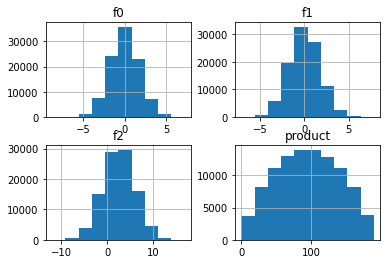

In [26]:
df_3[['f0', 'f1', 'f2', 'product']].hist()
plt.show()

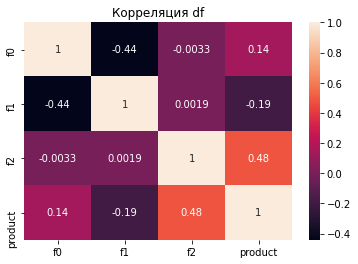

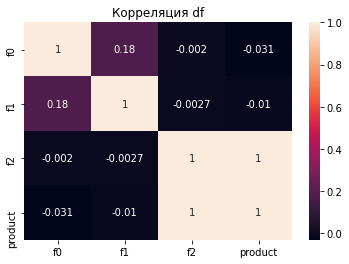

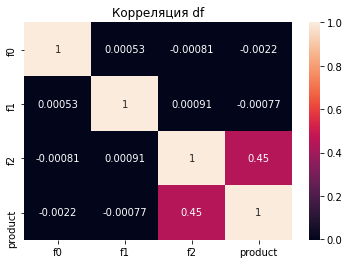

In [27]:
# Графики корреляции df_1, df_2, df_3

for data in all_df:
    sns.heatmap(data.corr(), annot=True)
    plt.title('Корреляция df')
    plt.show()

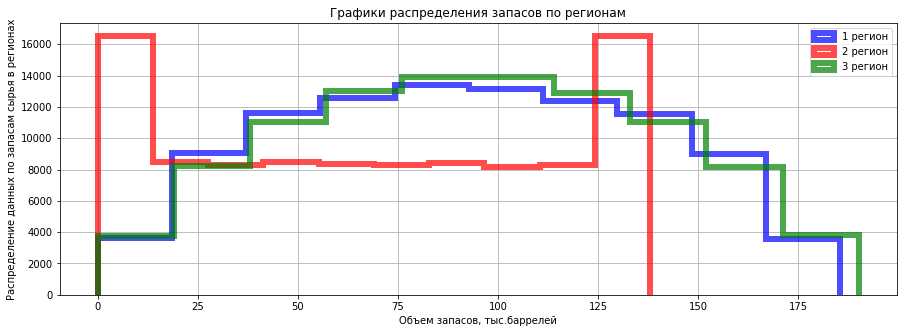

In [28]:
plt.title('Графики распределения запасов по регионам')
df_1['product'].hist(figsize=(15, 5),
                     grid=True, alpha=0.7, histtype='step', linewidth=6, color='blue', label='1 регион')
df_2['product'].hist(figsize=(15, 5),
                     grid=True, alpha=0.7, histtype='step', linewidth=6, color='red', label='2 регион')
df_3['product'].hist(figsize=(15, 5),
                     grid=True, alpha=0.7, histtype='step', linewidth=6, color='green', label='3 регион')
plt.xlabel('Объем запасов, тыс.баррелей')
plt.ylabel('Распределение данных по запасам сырья в регионах')
plt.legend()
plt.show()

Первый и третий регион имеют нормальное распределение запасов, во втором регион встречаются 2 моды.

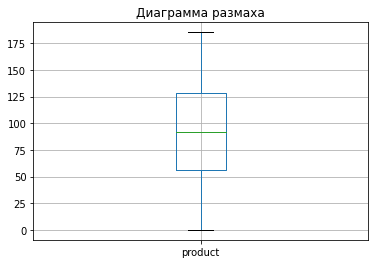

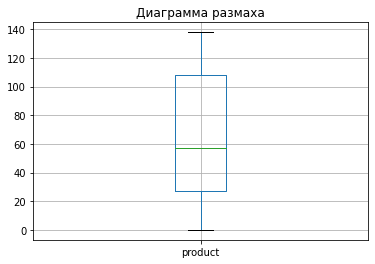

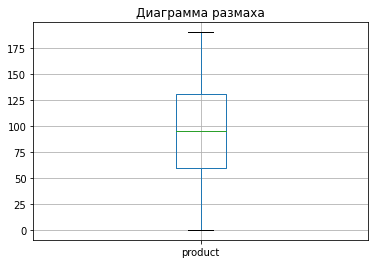

In [29]:
# диаграммы размаха для столбца "product" таблиц df_1, df_2, df_3 соответственно

for data in all_df:
    data.boxplot(column='product')
    plt.title('Диаграмма размаха')
    plt.show()

### Вывод

В результате предобработки данных и анализа данных иммеем следующее:<br><br>- Размеры таблиц:<br>--df_1: 99774 строк, 5 столбцов <br>--df_2: 99774 строк, 5 столбцов<br>--df_: 99802 строк, 5 столбцов
<br><br>- Таблицы имеют числовые данные (за исключением столбца id с названием скважин). Для обучения модели подходит только линейная регрессия<br><br>- Явные дубликаты отсутствуют<br><br> - Пропуски отсутствуют.<br><br> - Названия столбцов корректные<br><br> - Обнаружены и удалены неявные дубликаты: дублирующиеся названия скважин с различающимися признаками (df_1 - 113 скважин, df_2 - 113 скважины, df_3 - 98 скважины).<br><br> - Проверили  корреляцию - в показателях корреляции регионов 1 и 3 сильной корреляции данных нетВ регионе 2 заметна сильная взаимосвязь признака f2 и целевого признака, почти единица (Причина неизвестна, данные синтетические).

## Обучение и проверка модели

f0, f1 и f2 - признаки (три признака точек, неважно, что они  означают, но сами признаки значимы)
product - целевой признак (объем запасов в скважине, тыс. баррелей)
Для обучения модели подходит только линейная регрессия. Цель числовая, это задача регрессии.

In [30]:
# проверка размера выборок

def selection(data):
    
    # признаки и целевой признак
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    
    # разбиваем данные df_1, df_2, df_3 на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    return features_train, target_train, features_valid, target_valid

In [31]:
features_train_1, target_train_1, features_valid_1, target_valid_1 = selection(df_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = selection(df_2)
features_train_3, target_train_3, features_valid_3, target_valid_3 = selection(df_3)

print('Размер обучающей выборки df_1:')
print(features_train_1.shape)
print(target_train_1.shape)
print('Размер обучающей выборки df_2:')
print(features_train_2.shape)
print(target_train_2.shape)
print('Размер обучающей выборки df_3:')
print(features_train_3.shape)
print(target_train_3.shape)
print('Размер валидационной выборки df_1:')
print(features_valid_1.shape)
print(target_valid_1.shape)
print('Размер валидационной выборки df_2:')
print(features_valid_2.shape)
print(target_valid_2.shape)
print('Размер валидационной выборки df_3:')
print(features_valid_3.shape)
print(target_valid_3.shape)
print()

Размер обучающей выборки df_1:
(74830, 3)
(74830,)
Размер обучающей выборки df_2:
(74830, 3)
(74830,)
Размер обучающей выборки df_3:
(74851, 3)
(74851,)
Размер валидационной выборки df_1:
(24944, 3)
(24944,)
Размер валидационной выборки df_2:
(24944, 3)
(24944,)
Размер валидационной выборки df_3:
(24951, 3)
(24951,)



In [32]:
# модель линейной регрессии

def linear_regression_model(data):
    
    # признаки и целевой признак
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    
    # разбиваем данные df_1, df_2, df_3 на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    
    # обучение модели
    model.fit(features_train, target_train)
    
    # прогноз
    predictions = model.predict(features_valid)
    
    # расчет rmse
    rmse = mean_squared_error(target_valid, predictions)**0.5
    
    # расчет предсказанного среднего запаса сырья
    predictions_mean =  predictions.sum() / len(predictions)
    
    return target_valid, predictions, rmse, predictions_mean 

In [33]:
# Показатели по регионам

target_valid_1, predictions_1, rmse_1, predictions_mean_1 = linear_regression_model(df_1)
target_valid_2, predictions_2, rmse_2, predictions_mean_2 = linear_regression_model(df_2)
target_valid_3, predictions_3, rmse_3, predictions_mean_3 = linear_regression_model(df_3)

print('1 регион')
print()
print('Средний запас предсказанного сырья =', predictions_mean_1, 'rmse =', rmse_1)
print('Средний запас реального сырья =', df_1['product'].mean())
print()
print('2 регион')
print()
print('Средний запас предсказанного сырья =', predictions_mean_2, 'rmse =', rmse_2)
print('Средний запас реального сырья =', df_2['product'].mean())
print()
print('3 регион')
print()
print('Средний запас предсказанного сырья =', predictions_mean_3, 'rmse =', rmse_3)
print('Средний запас реального сырья =', df_3['product'].mean())

1 регион

Средний запас предсказанного сырья = 92.52469024570901 rmse = 37.617292443412616
Средний запас реального сырья = 92.49856281260517

2 регион

Средний запас предсказанного сырья = 68.46601778107235 rmse = 0.8904514565085925
Средний запас реального сырья = 68.83771126846999

3 регион

Средний запас предсказанного сырья = 94.93510901053764 rmse = 39.938915870029646
Средний запас реального сырья = 95.01085680312825


Лучше всего модель работает во 2-ом регионе, там самое низкое среднеквадратичное отклонение 0.8904514565085925. Но во втором регионе самый низкий средний объем запасов сырья. <br> 1-ый и 3-ий регионы похожи, rmse = 37.617292443412616 и rmse = 39.938915870029646 соответственно. Отклонение большое. Но в 3-ем регионе самый большой объем запасов сырья.

## Подготовка к расчёту прибыли

Условия задачи:

КОНСТАНТЫ:

In [34]:
# при разведке региона исследуют 500 точек
POINTS_EXPLORATION = 500

# количество лучших точек для разработки (выбирают с помощью машинного обучения)
POINTS_DEVELOPMENT = 200

# бюджет на разратотку скважин в одном регионе (расходы, рублей)
DEVELOPMENT_BUDGET = 10000000000

# доход с 1 барреля сырья (рублей)
INCOME_FROM_1_BARREL = 450

# доход с 1 барреля сырья (рублей), так как объем указан в тысячах барелей
REVENUE_1_PRODUCT = 450000

# вероятность убытков
PROBABILITY_OF_LOSSER = 0.025

In [35]:
# расчет бюджета на разработку 1 скважины в регионе

budget_per_well = DEVELOPMENT_BUDGET / POINTS_DEVELOPMENT
print('Бюджет на разработку 1 скважины в регионе', budget_per_well)

Бюджет на разработку 1 скважины в регионе 50000000.0


In [36]:
# расчет объема сырья для безубыточности

volume = budget_per_well / REVENUE_1_PRODUCT
print('Необходимы объем запасов сырья для безубыточности:', volume)

Необходимы объем запасов сырья для безубыточности: 111.11111111111111


In [37]:
print('Средний запас реального сырья 1 региона =', df_1['product'].mean())
print('Средний запас реального сырья 2 региона =', df_2['product'].mean())
print('Средний запас реального сырья 3 региона =', df_3['product'].mean())

Средний запас реального сырья 1 региона = 92.49856281260517
Средний запас реального сырья 2 региона = 68.83771126846999
Средний запас реального сырья 3 региона = 95.01085680312825


In [38]:
print('Средний запас предсказанного сырья 1 региона =', predictions_mean_1)
print('Средний запас предсказанного сырья 2 региона =', predictions_mean_2)
print('Средний запас предсказанного сырья 3 региона =', predictions_mean_3)

Средний запас предсказанного сырья 1 региона = 92.52469024570901
Средний запас предсказанного сырья 2 региона = 68.46601778107235
Средний запас предсказанного сырья 3 региона = 94.93510901053764


Минимальный объем сырья, при котором не будет убытка = 111,11 тыс.баррелей. Мы видим, что ни средний реальный объем запасов сырья, ни средний предсказанный объем запасов сырья не соответствуют объему безубыточности (все регионы убыточны). Но, по услувию задачи, надо исследовать 500 скважин и выбрать из них 200 самых лучших для разработки.

## Расчёт прибыли и рисков 

### Функция для расчета прибыли по выбранным скважинам и предсказаниям модели

In [39]:
# расчет прибыли с 200 лучших по предсказаниям скважин регионов

def income(target_valid, predictions):
    target_valid = pd.Series(target_valid).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    # отбор (сортировка) предсказаний по убыванию
    predictions_sorted = predictions.sort_values(ascending=False)
    # индексы скважин с максимальным значением предсказаний
    selected = target_valid[predictions_sorted.index][:POINTS_DEVELOPMENT]
    
    return (REVENUE_1_PRODUCT * selected.sum() - DEVELOPMENT_BUDGET)

In [40]:
print('Прибыль с 200 лучших по предсказаниям скважин 1 регион:', income(target_valid_1, predictions_1))
print('Прибыль с 200 лучших по предсказаниям скважин 2 регион:', income(target_valid_2, predictions_2))
print('Прибыль с 200 лучших по предсказаниям скважин 3 регион:', income(target_valid_3, predictions_3))

Прибыль с 200 лучших по предсказаниям скважин 1 регион: 3364099755.1334553
Прибыль с 200 лучших по предсказаниям скважин 2 регион: 2415086696.681511
Прибыль с 200 лучших по предсказаниям скважин 3 регион: 2513769272.9195995


### Расчет рисков и прибыли для каждого региона с применением техники Bootstrap 

In [41]:
state = np.random.RandomState(12345)

In [42]:
def bootstrap(target_valid, predictions):
    
    values = []
    
    for i in range(1000):
        target_subsample = target_valid.reset_index(drop=True).sample(
            n=POINTS_EXPLORATION, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        inc = income(target_subsample, probs_subsample)
        values.append(inc)

    values = pd.Series(values)
    
    lower = int(values.quantile(PROBABILITY_OF_LOSSER))
    upper = int(values.quantile(1 - PROBABILITY_OF_LOSSER))
    values_mean = int(values.mean())
    risk_loss = (len(values[values < 0]) / len(values)) * 100
    
    return values_mean, lower, upper, risk_loss

In [43]:
values_mean_1, lower_1, upper_1, risk_loss_1 = bootstrap(target_valid_1, predictions_1)
values_mean_2, lower_2, upper_2, risk_loss_2 = bootstrap(target_valid_2, predictions_2)
values_mean_3, lower_3, upper_3, risk_loss_3 = bootstrap(target_valid_3, predictions_3)

In [44]:
print('Средняя прибыль лучших месторождений региона 1 =', values_mean_1)
print('Средняя прибыль лучших месторождений региона 2 =', values_mean_2)
print('Средняя прибыль лучших месторождений региона 3 =', values_mean_3)

Средняя прибыль лучших месторождений региона 1 = 441591294
Средняя прибыль лучших месторождений региона 2 = 419790751
Средняя прибыль лучших месторождений региона 3 = 392909227


In [45]:
print('95% доверительный интервал средней прибыли лучших месторождений региона 1 =', lower_1, upper_1)
print()
print('95% доверительный интервал средней прибыли лучших месторождений региона 2 =', lower_2, upper_2)
print()
print('95% доверительный интервал средней прибыли лучших месторождений региона 3 =', lower_3, upper_3)

95% доверительный интервал средней прибыли лучших месторождений региона 1 = -81107345 944686256

95% доверительный интервал средней прибыли лучших месторождений региона 2 = 8841056 814549705

95% доверительный интервал средней прибыли лучших месторождений региона 3 = -124062959 926113379


In [46]:
print('Риск убытка лучших месторождений региона 1 =', risk_loss_1, '%')
print('Риск убытка лучших месторождений региона 2 =', risk_loss_2, '%')
print('Риск убытка лучших месторождений региона 3 =', risk_loss_3, '%')

Риск убытка лучших месторождений региона 1 = 4.5 %
Риск убытка лучших месторождений региона 2 = 2.0 %
Риск убытка лучших месторождений региона 3 = 7.5 %


## Вывод

В результате предобработки исходных данных и анализа данных имеем следующее:
- Размеры таблиц:
--df_1: 99774 строк, 5 столбцов
--df_2: 99774 строк, 5 столбцов
--df_: 99802 строк, 5 столбцов
- Таблицы имеют числовые данные (за исключением столбца id с названием скважин). Для обучения модели подходит только линейная регрессия
- Явные дубликаты отсутствуют
- Пропуски отсутствуют.
- Названия столбцов корректные
- Обнаружены и удалены неявные дубликаты: дублирующиеся названия скважин с различающимися признаками (df_1 - 113 скважин, df_2 - 113 скважины, df_3 - 98 скважины).
- Проверили корреляцию - в показателях корреляции регионов 1 и 3 сильной корреляции данных нетВ регионе 2 заметна сильная взаимосвязь признака f2 и целевого признака, почти единица (Причина неизвестна, данные синтетические).

f0, f1 и f2 - признаки (три признака точек, неважно, что они означают, но сами признаки значимы) product - целевой признак (объем запасов в скважине, тыс. баррелей) Для обучения модели подходит только линейная регрессия. Цель числовая, это задача регрессии.

При обучении модели линейной регрессии лучше всего модель работает во 2-ом регионе, там самое низкое среднеквадратичное отклонение 0.8904514565085925. Но во втором регионе самый низкий средний общий объем запасов сырья. 1-ый и 3-ий регионы похожи, rmse = 37.617292443412616 и rmse = 39.938915870029646 соответственно. Отклонение большое. Но в 3-ем регионе самый большой объем запасов сырья.

Средний запас реального сырья 1 региона = 92.49856281260517<br>
Средний запас реального сырья 2 региона = 68.83771126846999<br>
Средний запас реального сырья 3 региона = 95.01085680312825<br>
Средний запас предсказанного сырья 1 региона = 92.52469024570901<br>
Средний запас предсказанного сырья 2 региона = 68.46601778107235<br>
Средний запас предсказанного сырья 3 региона = 94.93510901053764<br>
Минимальный объем сырья, при котором не будет убытка = 111,11 тыс.баррелей. Мы видим, что ни средний реальный объем запасов сырья, ни средний предсказанный объем запасов сырья не соответствуют объему безубыточности (все регионы убыточны). Но, по услувию задачи, надо исследовать 500 скважин и выбрать из них 200 самых лучших для разработки.

Прибыль с 200 лучших по предсказаниям скважин 1 регион: 3364099755.1334553<br>
Прибыль с 200 лучших по предсказаниям скважин 2 регион: 2415086696.681511<br>
Прибыль с 200 лучших по предсказаниям скважин 3 регион: 2513769272.9195995<br>

Расчет рисков и прибыли для каждого региона с применением техники Bootstrap<br>Средняя прибыль лучших месторождений региона 1 = 441591294<br>
Средняя прибыль лучших месторождений региона 2 = 419790751<br>
Средняя прибыль лучших месторождений региона 3 = 392909227<br>Риск убытка лучших месторождений региона 1 = 4.5 %<br>
Риск убытка лучших месторождений региона 2 = 2.0 %<br>
Риск убытка лучших месторождений региона 3 = 7.5 %<br>

Для расчёта распределения прибыли применена техника Bootstrap с 1000 выборок, которая показала, что наиболее подходящий для разработки регион - 2 (несмотря на то, что средняя прибыль больше в 1 регионе), так как у него наименьшая вероятность убытков - 2% (по условию после оценки нужно оставить только те регионы в которых вероятность убытков меньше 2,5%).